In [1]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import os
import copy
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import seaborn as sns
from torchvision import datasets, transforms, models
from torch.utils.data import Dataset, random_split, DataLoader
import cv2
from PIL import Image

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [3]:
import zipfile

# Path to the zip file
zip_file_path = 'TinyImageNet.zip'

# Destination directory to unzip files
extract_dir = './'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)


In [3]:
path = './tiny-imagenet-200/train/'

subfolders = [name for name in os.listdir(path) if os.path.isdir(os.path.join(path, name))]
subfolders.sort()
subfolders

['n01443537',
 'n01629819',
 'n01641577',
 'n01644900',
 'n01698640',
 'n01742172',
 'n01768244',
 'n01770393',
 'n01774384',
 'n01774750',
 'n01784675',
 'n01855672',
 'n01882714',
 'n01910747',
 'n01917289',
 'n01944390',
 'n01945685',
 'n01950731',
 'n01983481',
 'n01984695',
 'n02002724',
 'n02056570',
 'n02058221',
 'n02074367',
 'n02085620',
 'n02094433',
 'n02099601',
 'n02099712',
 'n02106662',
 'n02113799',
 'n02123045',
 'n02123394',
 'n02124075',
 'n02125311',
 'n02129165',
 'n02132136',
 'n02165456',
 'n02190166',
 'n02206856',
 'n02226429',
 'n02231487',
 'n02233338',
 'n02236044',
 'n02268443',
 'n02279972',
 'n02281406',
 'n02321529',
 'n02364673',
 'n02395406',
 'n02403003',
 'n02410509',
 'n02415577',
 'n02423022',
 'n02437312',
 'n02480495',
 'n02481823',
 'n02486410',
 'n02504458',
 'n02509815',
 'n02666196',
 'n02669723',
 'n02699494',
 'n02730930',
 'n02769748',
 'n02788148',
 'n02791270',
 'n02793495',
 'n02795169',
 'n02802426',
 'n02808440',
 'n02814533',
 'n028

In [4]:
#getting classes names
classes_file_path = './tiny-imagenet-200/words.txt'
list_classes =[]
with open(classes_file_path, 'r') as file:
    for line in file:
        class_details = {'class code':line.split('\t')[0], 'class name': line.split('\t')[1].split('\n')[0]}
        list_classes.append(class_details)
len(list_classes)

82115

In [5]:
classes =[]
for code in subfolders:
    for cls in list_classes:
        if cls['class code'] == code:
            classes.append(cls['class name'])
classes


['goldfish, Carassius auratus',
 'European fire salamander, Salamandra salamandra',
 'bullfrog, Rana catesbeiana',
 'tailed frog, bell toad, ribbed toad, tailed toad, Ascaphus trui',
 'American alligator, Alligator mississipiensis',
 'boa constrictor, Constrictor constrictor',
 'trilobite',
 'scorpion',
 'black widow, Latrodectus mactans',
 'tarantula',
 'centipede',
 'goose',
 'koala, koala bear, kangaroo bear, native bear, Phascolarctos cinereus',
 'jellyfish',
 'brain coral',
 'snail',
 'slug',
 'sea slug, nudibranch',
 'American lobster, Northern lobster, Maine lobster, Homarus americanus',
 'spiny lobster, langouste, rock lobster, crawfish, crayfish, sea crawfish',
 'black stork, Ciconia nigra',
 'king penguin, Aptenodytes patagonica',
 'albatross, mollymawk',
 'dugong, Dugong dugon',
 'Chihuahua',
 'Yorkshire terrier',
 'golden retriever',
 'Labrador retriever',
 'German shepherd, German shepherd dog, German police dog, alsatian',
 'standard poodle',
 'tabby, tabby cat',
 'Persia

In [6]:
final_classes = []
for i, cls in enumerate(classes):
    new_name = cls.split(',')[0]
    final_classes.append(new_name)
print(final_classes)
print(len(final_classes))

['goldfish', 'European fire salamander', 'bullfrog', 'tailed frog', 'American alligator', 'boa constrictor', 'trilobite', 'scorpion', 'black widow', 'tarantula', 'centipede', 'goose', 'koala', 'jellyfish', 'brain coral', 'snail', 'slug', 'sea slug', 'American lobster', 'spiny lobster', 'black stork', 'king penguin', 'albatross', 'dugong', 'Chihuahua', 'Yorkshire terrier', 'golden retriever', 'Labrador retriever', 'German shepherd', 'standard poodle', 'tabby', 'Persian cat', 'Egyptian cat', 'cougar', 'lion', 'brown bear', 'ladybug', 'fly', 'bee', 'grasshopper', 'walking stick', 'cockroach', 'mantis', 'dragonfly', 'monarch', 'sulphur butterfly', 'sea cucumber', 'guinea pig', 'hog', 'ox', 'bison', 'bighorn', 'gazelle', 'Arabian camel', 'orangutan', 'chimpanzee', 'baboon', 'African elephant', 'lesser panda', 'abacus', 'academic gown', 'altar', 'apron', 'backpack', 'bannister', 'barbershop', 'barn', 'barrel', 'basketball', 'bathtub', 'beach wagon', 'beacon', 'beaker', 'beer bottle', 'bikini

# creating classes file for val data

In [7]:
val_path = './tiny-imagenet-200/val/val_annotations.txt'
val_labels = []
with open(val_path, 'r') as file:
    for line in file:
        class_code = line.split()[1]
        class_label = subfolders.index(class_code)
        val_labels.append(class_label)
print(val_labels)
print(len(val_labels))

[107, 139, 140, 69, 69, 161, 147, 73, 145, 39, 158, 188, 39, 120, 21, 79, 33, 165, 153, 119, 123, 124, 18, 1, 170, 141, 171, 158, 79, 25, 121, 179, 124, 130, 176, 86, 6, 129, 142, 127, 33, 33, 44, 40, 110, 40, 159, 184, 57, 80, 9, 34, 39, 14, 75, 199, 10, 99, 66, 160, 69, 177, 25, 101, 102, 173, 118, 101, 0, 95, 7, 131, 199, 113, 36, 5, 30, 4, 187, 16, 53, 23, 90, 109, 176, 161, 44, 20, 21, 35, 83, 23, 184, 63, 129, 55, 30, 25, 166, 145, 90, 42, 38, 130, 110, 36, 194, 118, 32, 151, 174, 67, 109, 172, 138, 53, 57, 101, 37, 131, 98, 80, 125, 50, 73, 172, 196, 164, 139, 78, 2, 190, 120, 165, 185, 155, 139, 131, 47, 10, 170, 15, 84, 173, 24, 137, 180, 124, 158, 30, 91, 189, 29, 121, 55, 111, 51, 154, 101, 59, 21, 184, 14, 47, 162, 63, 181, 67, 75, 131, 129, 185, 164, 159, 113, 103, 49, 125, 142, 30, 33, 115, 46, 172, 149, 113, 136, 57, 41, 17, 120, 13, 8, 150, 83, 131, 74, 16, 23, 58, 53, 106, 176, 179, 83, 9, 66, 121, 13, 98, 66, 4, 166, 66, 71, 163, 155, 176, 30, 179, 134, 115, 181, 31, 

In [8]:
class TinyINDataset(Dataset):
	def __init__(self, imagePaths, labels, transforms):
		# store the image and mask filepaths, and augmentation
		# transforms
		self.imagePaths = imagePaths
		self.labels = labels
		self.transforms = transforms
		def sort_key(filename): #this is added because the file names are not sorted correctly with default sorted
			return int(filename.split('_')[1].split('.')[0])
		self.img_names = sorted(os.listdir(imagePaths), key=sort_key)
		assert len(self.img_names) == len(self.labels), "mismatch between num images and num labels"
	def __len__(self):
		# return the number of total samples contained in the dataset
		return len(self.labels)
	def __getitem__(self, idx):
		# grab the image path from the current index
		name = os.path.join(self.imagePaths,self.img_names[idx])

		# load the image from disk, swap its channels from BGR to RGB,
		# and read the associated mask from disk in grayscale mode
		image = cv2.imread(name)

		image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
		label = int(self.labels[idx])

		#mask = cv2.imread(self.maskPaths[idx], 0)
		# check to see if we are applying any transformations
		if self.transforms is not None:
			# apply the transformations to both image and its mask

			image = self.transforms(image)

			#mask = self.transforms(mask)
		# return a tuple of the image and its mask
		return image, label

In [9]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = datasets.ImageFolder(root='./tiny-imagenet-200/train', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

transform_val = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor() ])
valset = TinyINDataset(imagePaths='./tiny-imagenet-200/val/images/', labels=val_labels, transforms=transform_val)
valloader = torch.utils.data.DataLoader(valset, batch_size=128, shuffle=True)

# calculating training mean and std to normalize


In [10]:
def get_mean_std(loader):
  mean = 0.
  std = 0.
  total_image = 0
  for images, _ in loader:
    image_count = images.size(0)
    images = images.view(image_count, images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
    total_image += image_count
  mean /= total_image
  std /= total_image
  print('mean: {}'.format(mean))
  print('std: {}'.format(std))
  return mean, std

In [11]:
im_mean, im_std = get_mean_std(trainloader)

mean: tensor([0.4802, 0.4481, 0.3975])
std: tensor([0.2296, 0.2263, 0.2255])


# Normalizing the data

In [12]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=im_mean, std=im_std)
                                ])
trainset = datasets.ImageFolder(root='./tiny-imagenet-200/train', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True)

transform_val = transforms.Compose([transforms.ToPILImage(), transforms.ToTensor(),
                                    transforms.Normalize(mean=im_mean, std=im_std)])
valset = TinyINDataset(imagePaths='./tiny-imagenet-200/val/images/', labels=val_labels, transforms=transform_val)
valloader = torch.utils.data.DataLoader(valset, batch_size=256, shuffle=True)

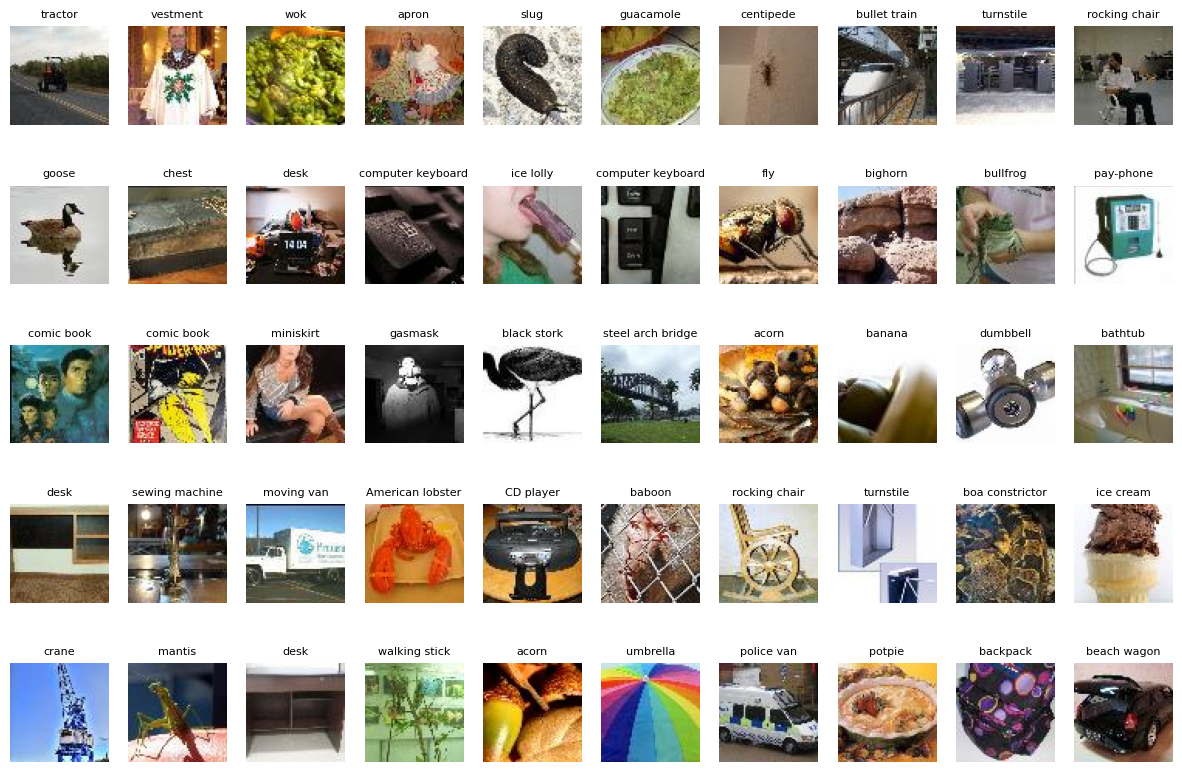

In [13]:
for images, labels in valloader:
  #print(images[2])
  fig, ax = plt.subplots(5,10, figsize=(15,10))
  ax = ax.flatten()
  for i, im in enumerate(images[:50,...]):
    #print(im.size())
    im = (im*im_std[:,None, None])+im_mean[:,None,None]
    ax[i].imshow(im.numpy().transpose(1, 2, 0))
    ax[i].axis('off')
    ax[i].set_title(final_classes[labels[i].item()], fontsize=8)
    #plt.imshow(images[0].numpy().transpose(1, 2, 0))
  plt.show()
  #print(labels[0])
  break

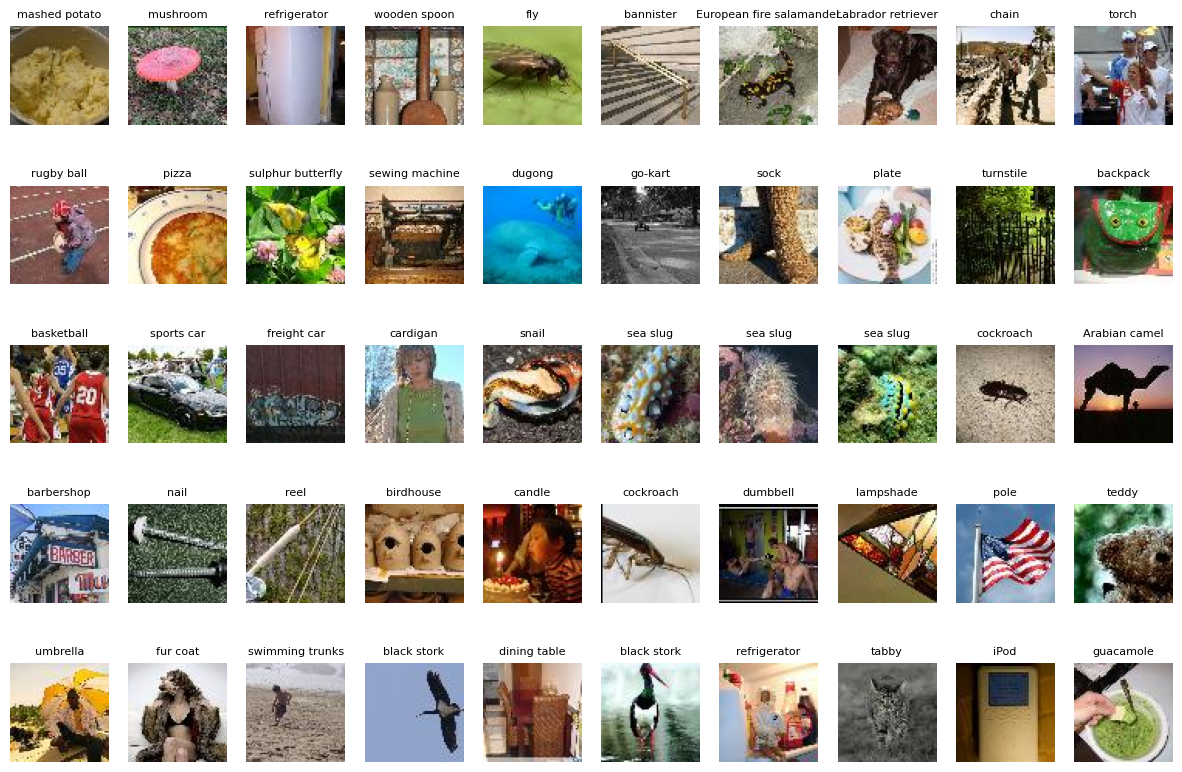

In [14]:
for images, labels in trainloader:
  #print(images[2])
  fig, ax = plt.subplots(5,10, figsize=(15,10))
  ax = ax.flatten()
  for i, im in enumerate(images[:50,...]):
    im = (im*im_std[:,None, None])+im_mean[:,None,None]
    ax[i].imshow(im.numpy().transpose(1, 2, 0))
    ax[i].axis('off')
    ax[i].set_title(final_classes[labels[i].item()], fontsize=8)
    #plt.imshow(images[0].numpy().transpose(1, 2, 0))
  plt.show()
  #print(labels[0])
  break

# Creating the first model using CNN with 8 convolutions

In [42]:
class Classifier(nn.Module):
  def __init__(self):
    super(Classifier, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3, padding=1)
    self.BN1 = nn.BatchNorm2d(num_features=32)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
    self.BN2 = nn.BatchNorm2d(num_features=32)

    self.conv2_drop = nn.Dropout2d()

    self.conv3 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3, padding=1)
    self.BN3 = nn.BatchNorm2d(num_features=64)
    self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
    self.BN4 = nn.BatchNorm2d(num_features=64)

    self.conv5 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3, padding=1)
    self.BN5 = nn.BatchNorm2d(num_features=128)
    self.conv6 = nn.Conv2d(in_channels=128,out_channels=128,kernel_size=3, padding=1)
    self.BN6 = nn.BatchNorm2d(num_features=128)

    self.conv7 = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3, padding=1)
    self.BN7 = nn.BatchNorm2d(num_features=256)
    self.conv8 = nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3, padding=1)
    self.BN8 = nn.BatchNorm2d(num_features=256)

    self.fc1 = nn.Linear(4096, 1024)
    self.fc2 = nn.Linear(1024,512)
    self.fc3 = nn.Linear(512,200)

  def forward(self, x):
    x = F.relu(self.BN1(self.conv1(x)))
    x = self.conv2_drop(F.max_pool2d(F.relu(self.conv2(x)), 2))
    x = self.conv2_drop(F.relu(self.BN3(self.conv3(x))))
    x = self.conv2_drop(F.max_pool2d(F.relu(self.BN4(self.conv4(x))), 2))
    x = F.relu(self.BN5(self.conv5(x)))
    x = self.conv2_drop(F.max_pool2d(F.relu(self.BN6(self.conv6(x))), 2))
    x = F.relu(self.BN7(self.conv7(x)))
    x = self.conv2_drop(F.max_pool2d(F.relu(self.BN8(self.conv8(x))), 2))
    x = x.view(x.size(0),-1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

In [43]:
classifier_1 = Classifier()
learning_rate = 0.01
momentum = 0.9
optimizer = optim.SGD(classifier_1.parameters(), lr=learning_rate, momentum=momentum)
#exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=7, gamma=0.1)
loss_func = nn.CrossEntropyLoss()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
classifier_1.to(device)

Classifier(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN6): BatchNorm2d(128, eps=

In [15]:
def train_loop(model,  trainloader, optimizer, loss_func, lr_sched=None, log_interval=100, model_name='default', logs={}):
    model.train()
    for batch_id, (images, labels) in enumerate(trainloader):
        optimizer.zero_grad()
        inputs = images.to(device)
        labels = labels.to(device)
        outputs = model(inputs)
        loss = loss_func(outputs, labels)
        loss.backward()
        optimizer.step()
        if batch_id % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_id * len(images), len(trainloader.dataset),
                100. * batch_id / len(trainloader), loss.item()))
            logs[model_name]['train_losses'].append(loss.to('cpu').item())
    if lr_sched is not None:
      lr_sched.step()

In [16]:
def test_loop(model, loader, loss_func, logs={}, model_name='default'):
    test_loss = 0.0
    corrects = 0
    model.eval()
    with torch.no_grad():
        for data, labels in loader:
            outputs = model(data.to(device))
            loss = loss_func(outputs, labels.to(device))
            test_loss += loss.item()*len(data)
            _, preds = torch.max(outputs.data,1)
            corrects += torch.sum(preds == labels.to(device))
        test_loss = test_loss/len(loader.dataset)
        #test_losses.append(test_loss)
        test_acc = corrects.double() / len(loader.dataset)
        #test_accuracy.append(test_acc.to('cpu').item()*100)
        logs[model_name]['test_losses'].append(test_loss)
        logs[model_name]['test_accuracy'].append(test_acc.to('cpu').item()*100)
        print('Test Loss: {:.6f}\t Test Accuracy: {:.4f}%'.format(test_loss, test_acc*100))
    return test_acc, test_loss

In [17]:
logs ={}

In [ ]:
train_losses = []
test_losses = []
test_accuracy = []
epochs = 30
logs['classifier_1'] = {'train_losses': train_losses, 'test_losses': test_losses, 'test_accuracy': test_accuracy}
for epoch in range(epochs):
    train_loop(model=classifier_1, trainloader=trainloader, optimizer=optimizer, lr_sched=None, loss_func=loss_func,model_name='classifier_1', logs=logs)
    test_loop(model=classifier_1, loader=valloader, loss_func=loss_func, model_name='classifier_1', logs=logs)

Train Epoch: 0 [0/100000 (0%)]	Loss: 5.302234
Train Epoch: 0 [25600/100000 (26%)]	Loss: 5.267594
Train Epoch: 0 [51200/100000 (51%)]	Loss: 5.136374
Train Epoch: 0 [76800/100000 (77%)]	Loss: 5.130181
Test Loss: 5.624712	 Test Accuracy: 0.5200%
Train Epoch: 1 [0/100000 (0%)]	Loss: 5.010193
Train Epoch: 1 [25600/100000 (26%)]	Loss: 5.035644
Train Epoch: 1 [51200/100000 (51%)]	Loss: 5.027056
Train Epoch: 1 [76800/100000 (77%)]	Loss: 5.058286
Test Loss: 5.510351	 Test Accuracy: 1.5900%
Train Epoch: 2 [0/100000 (0%)]	Loss: 4.825148
Train Epoch: 2 [25600/100000 (26%)]	Loss: 4.790183
Train Epoch: 2 [51200/100000 (51%)]	Loss: 4.755869
Train Epoch: 2 [76800/100000 (77%)]	Loss: 4.753013
Test Loss: 5.202673	 Test Accuracy: 2.8900%
Train Epoch: 3 [0/100000 (0%)]	Loss: 4.793344
Train Epoch: 3 [25600/100000 (26%)]	Loss: 4.553190
Train Epoch: 3 [51200/100000 (51%)]	Loss: 4.649247
Train Epoch: 3 [76800/100000 (77%)]	Loss: 4.540333
Test Loss: 4.982468	 Test Accuracy: 3.7900%
Train Epoch: 4 [0/100000 (0%

In [ ]:
#saving model params
torch.save(classifier_1.state_dict(), './model_data/classifier_1.1.pth')

In [ ]:
#reloading data if needed here

# new acrcheticture

# fc as pooling method

In [25]:
#reducing batch size due to GPU memory
trainloader_3 = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True)
valloader_3 =  torch.utils.data.DataLoader(valset, batch_size=256, shuffle=True)

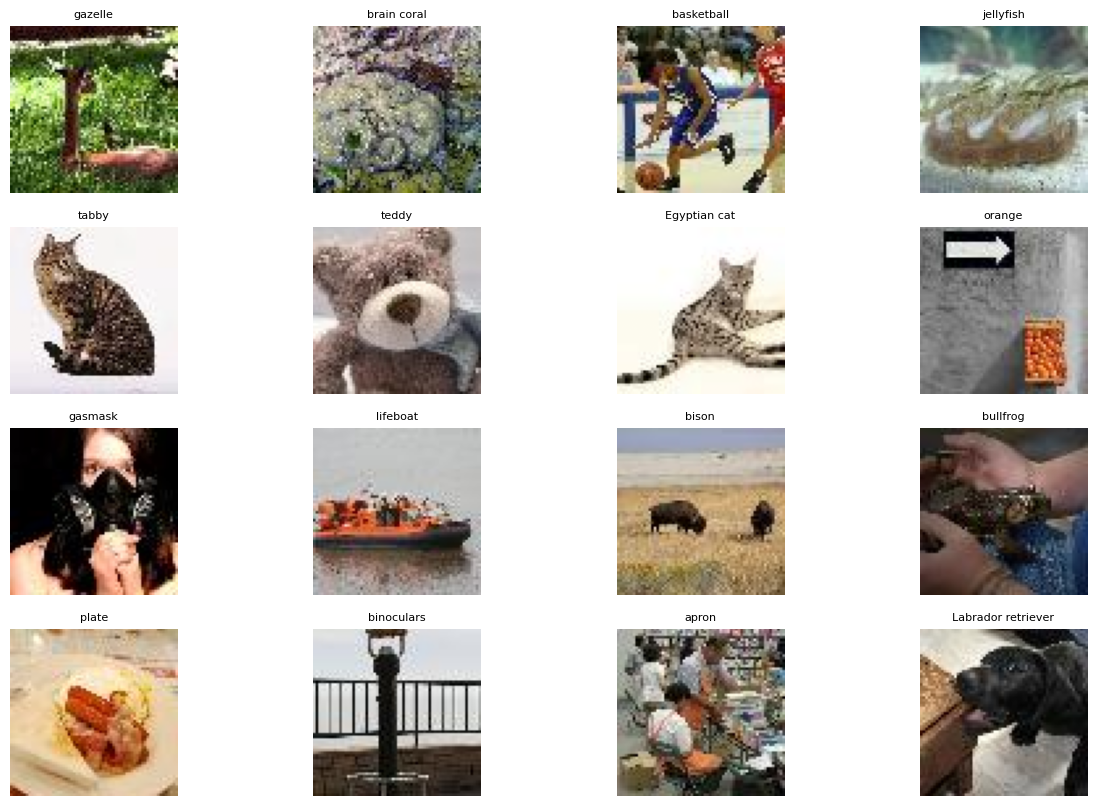

In [19]:
for images, labels in valloader_3:
  #print(images[2])
  fig, ax = plt.subplots(4,4, figsize=(15,10))
  ax = ax.flatten()
  for i, im in enumerate(images[:16,...]):
    #print(im.size())
    im = (im*im_std[:,None, None])+im_mean[:,None,None]
    ax[i].imshow(im.numpy().transpose(1, 2, 0))
    ax[i].axis('off')
    ax[i].set_title(final_classes[labels[i].item()], fontsize=8)
    #plt.imshow(images[0].numpy().transpose(1, 2, 0))
  plt.show()
  #print(labels[0])
  break

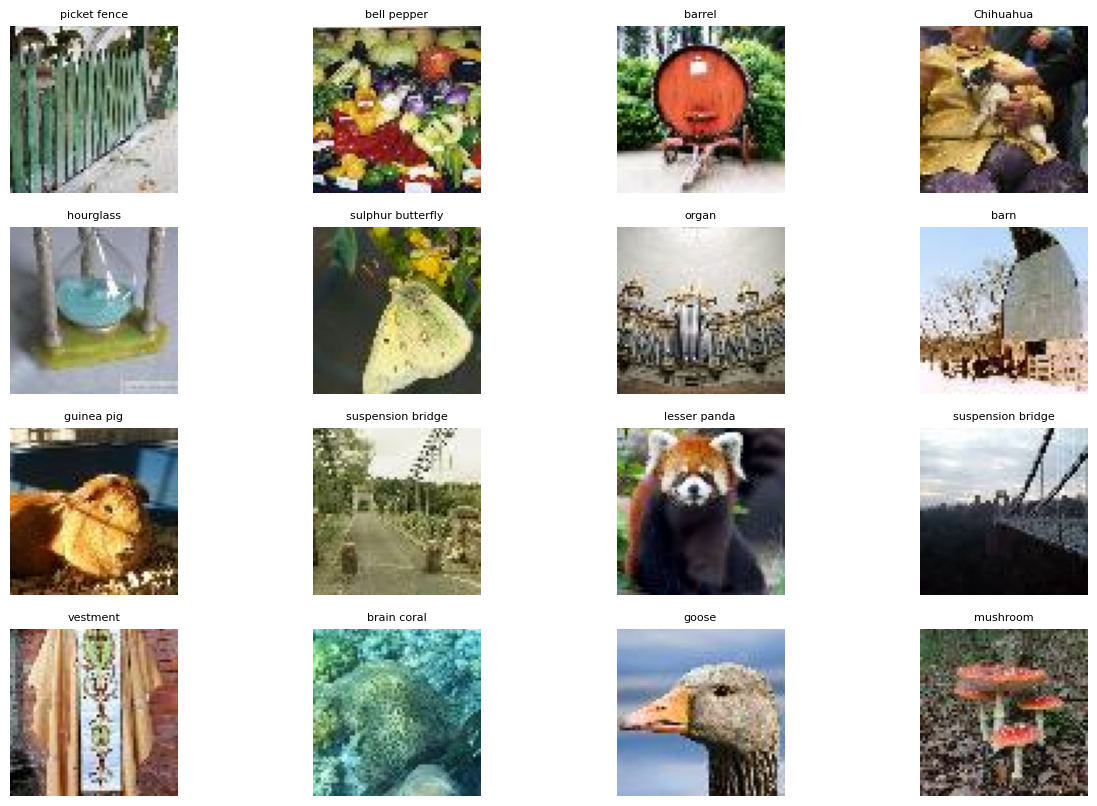

In [20]:
for images, labels in trainloader_3:
  #print(images[2])
  fig, ax = plt.subplots(4,4, figsize=(15,10))
  ax = ax.flatten()
  for i, im in enumerate(images[:16,...]):
    #print(im.size())
    im = (im*im_std[:,None, None])+im_mean[:,None,None]
    ax[i].imshow(im.numpy().transpose(1, 2, 0))
    ax[i].axis('off')
    ax[i].set_title(final_classes[labels[i].item()], fontsize=8)
    #plt.imshow(images[0].numpy().transpose(1, 2, 0))
  plt.show()
  #print(labels[0])
  break

In [ ]:
class Classifier_FC_asPool(nn.Module):
  def __init__(self):
    super(Classifier_FC_asPool, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3, padding=1)
    self.BN1 = nn.BatchNorm2d(num_features=32)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
    self.BN2 = nn.BatchNorm2d(num_features=32)

    self.conv2_drop = nn.Dropout2d()

    self.conv3 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3, padding=1)
    self.BN3 = nn.BatchNorm2d(num_features=64)
    self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
    self.BN4 = nn.BatchNorm2d(num_features=64)

    self.conv5 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3, padding=1)
    self.BN5 = nn.BatchNorm2d(num_features=128)
    self.conv6 = nn.Conv2d(in_channels=128,out_channels=128,kernel_size=3, padding=1)
    self.BN6 = nn.BatchNorm2d(num_features=128)

    self.fc_inner_3 = nn.Linear(32768, 8192)

    #reshape here again
    self.conv7 = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3, padding=1)
    self.BN7 = nn.BatchNorm2d(num_features=256)
    self.conv8 = nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3, padding=1)
    self.BN8 = nn.BatchNorm2d(num_features=256)

    self.fc1 = nn.Linear(4096, 1024)
    self.fc2 = nn.Linear(1024,512)
    self.fc3 = nn.Linear(512,200)

  def forward(self, x):
    x = F.relu(self.BN1(self.conv1(x)))
    x = self.conv2_drop(F.max_pool2d(F.relu(self.BN1(self.conv2(x))),2))

    x = self.conv2_drop(F.relu(self.BN3(self.conv3(x))))
    x = self.conv2_drop(F.max_pool2d(F.relu(self.BN4(self.conv4(x))),2))

    x = F.relu(self.BN5(self.conv5(x)))
    x = self.conv2_drop(F.relu(self.BN6(self.conv6(x))))
    #reshaping to feed to FC_inner_3
    x = x.view(x.size(0),-1)
    x = F.relu(self.fc_inner_3(x))
    x = x.view(x.size(0),128,8,8)

    x = F.relu(self.BN7(self.conv7(x)))
    x = self.conv2_drop(F.max_pool2d(F.relu(self.BN8(self.conv8(x))), 2))
    x = x.view(x.size(0),-1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

classifier_3 = Classifier_FC_asPool()
learning_rate = 0.01
momentum = 0.9
optimizer3 = optim.SGD(classifier_3.parameters(), lr=learning_rate, momentum=momentum)
#exp_lr_scheduler_3 = optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=7, gamma=0.1)
loss_func_3 = nn.CrossEntropyLoss()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
classifier_3.to(device)

Classifier_FC_asPool(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN6): BatchNorm2d

In [27]:
train_losses = []
test_losses = []
test_accuracy = []
epochs = 30
logs['classifier_3'] = {'train_losses': train_losses, 'test_losses': test_losses, 'test_accuracy': test_accuracy}

for epoch in range(epochs):
    train_loop(model=classifier_3, trainloader=trainloader_3, optimizer=optimizer3, lr_sched=None, loss_func=loss_func_3, model_name='classifier_3', logs=logs)
    test_loop(model=classifier_3, loader=valloader_3, loss_func=loss_func_3, model_name='classifier_3', logs=logs)

Train Epoch: 0 [0/100000 (0%)]	Loss: 5.302296
Train Epoch: 0 [25600/100000 (26%)]	Loss: 5.255497
Train Epoch: 0 [51200/100000 (51%)]	Loss: 5.202895
Train Epoch: 0 [76800/100000 (77%)]	Loss: 5.181131
Test Loss: 5.499395	 Test Accuracy: 0.4700%
Train Epoch: 1 [0/100000 (0%)]	Loss: 5.137042
Train Epoch: 1 [25600/100000 (26%)]	Loss: 5.082618
Train Epoch: 1 [51200/100000 (51%)]	Loss: 5.102505
Train Epoch: 1 [76800/100000 (77%)]	Loss: 5.045935
Test Loss: 5.385152	 Test Accuracy: 0.9400%
Train Epoch: 2 [0/100000 (0%)]	Loss: 5.057453
Train Epoch: 2 [25600/100000 (26%)]	Loss: 5.035336
Train Epoch: 2 [51200/100000 (51%)]	Loss: 5.101508
Train Epoch: 2 [76800/100000 (77%)]	Loss: 4.940987
Test Loss: 5.580900	 Test Accuracy: 1.0300%
Train Epoch: 3 [0/100000 (0%)]	Loss: 4.907598
Train Epoch: 3 [25600/100000 (26%)]	Loss: 4.870634
Train Epoch: 3 [51200/100000 (51%)]	Loss: 4.883520
Train Epoch: 3 [76800/100000 (77%)]	Loss: 4.851339
Test Loss: 5.174139	 Test Accuracy: 2.4100%
Train Epoch: 4 [0/100000 (0%

In [28]:
#saving model params
torch.save(classifier_3.state_dict(), './classifier_3.pth')

In [29]:
#saving losses and accuracies
import json

with open('DL_project_models_tracking_clf3.json', 'w') as f:
    json.dump(logs, f)


In [34]:
class Classifier_FC_asPool_1(nn.Module):
  def __init__(self):
    super(Classifier_FC_asPool_1, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3,out_channels=32,kernel_size=3, padding=1)
    self.BN1 = nn.BatchNorm2d(num_features=32)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, padding=1)
    self.BN2 = nn.BatchNorm2d(num_features=32)

    self.conv2_drop = nn.Dropout2d()
    #self.fc_inner_1 = nn.Linear(131072, 131072)
    #self.fc_inner_1_1 = nn.Linear(131072, 32768)
    #reshape here again then feed to conv2D

    self.conv3 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3, padding=1)
    self.BN3 = nn.BatchNorm2d(num_features=64)
    self.conv4 = nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1)
    self.BN4 = nn.BatchNorm2d(num_features=64)

    #self.fc_inner_2 = nn.Linear(65536, 65536)
    #self.fc_inner_2_2 = nn.Linear(65536, 16384)
    #reshape here to feed to conv2d

    self.conv5 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3, padding=1)
    self.BN5 = nn.BatchNorm2d(num_features=128)
    self.conv6 = nn.Conv2d(in_channels=128,out_channels=128,kernel_size=3, padding=1)
    self.BN6 = nn.BatchNorm2d(num_features=128)

    self.fc_inner_3 = nn.Linear(32768, 8192)
    #self.fc_inner_3_2 = nn.Linear(32768, 8192)

    #reshape here again
    self.conv7 = nn.Conv2d(in_channels=128,out_channels=256,kernel_size=3, padding=1)
    self.BN7 = nn.BatchNorm2d(num_features=256)
    self.conv8 = nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3, padding=1)
    self.BN8 = nn.BatchNorm2d(num_features=256)
    self.DO = nn.Dropout()
    self.fc1 = nn.Linear(4096, 1024)
    self.fc2 = nn.Linear(1024,512)
    self.fc3 = nn.Linear(512,200)

  def forward(self, x):
    x = F.relu(self.BN1(self.conv1(x)))
    x = self.conv2_drop(F.max_pool2d(F.relu(self.BN1(self.conv2(x))),2))
    #reshaping to feed to FC_inner_1
    #x = x.view(x.size(0),-1)
    #x = F.relu(self.fc_inner_1(x))
    #x = F.relu(self.fc_inner_1_1(x))
    #reshaing to feed to conv2d
    #x = x.view(x.size(0),32,16,16)


    x = self.conv2_drop(F.relu(self.BN3(self.conv3(x))))
    x = self.conv2_drop(F.max_pool2d(F.relu(self.BN4(self.conv4(x))),2))
    #reshaping to feed to FC_inner_2
    #x = x.view(x.size(0),-1)
    #x = F.relu(self.fc_inner_2(x))
    #x = F.relu(self.fc_inner_2_2(x)) #reduced dims
    #reshaing to feed to conv2d
    #x = x.view(x.size(0),64,16,16)

    x = F.relu(self.BN5(self.conv5(x)))
    x = self.conv2_drop(F.relu(self.BN6(self.conv6(x))))
    #reshaping to feed to FC_inner_3
    x = x.view(x.size(0),-1)
    x = F.relu(self.fc_inner_3(x))
    x = self.DO(x)
    #x = F.relu(self.fc_inner_3_2(x)) #reduced dims
    #reshaing to feed to conv2d
    x = x.view(x.size(0),128,8,8)

    x = F.relu(self.BN7(self.conv7(x)))
    x = self.conv2_drop(F.max_pool2d(F.relu(self.BN8(self.conv8(x))), 2))
    x = x.view(x.size(0),-1)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x

classifier_3_1 = Classifier_FC_asPool_1()
learning_rate = 0.01
momentum = 0.9
optimizer_3_1 = optim.SGD(classifier_3_1.parameters(), lr=learning_rate, momentum=momentum)
#exp_lr_scheduler_3 = optim.lr_scheduler.StepLR(optimizer=optimizer, step_size=7, gamma=0.1)
loss_func_3_1 = nn.CrossEntropyLoss()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
classifier_3_1.to(device)

Classifier_FC_asPool_1(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (BN6): BatchNorm

In [ ]:
train_losses = []
test_losses = []
test_accuracy = []
epochs = 30
logs['classifier_3_1'] = {'train_losses': train_losses, 'test_losses': test_losses, 'test_accuracy': test_accuracy}

for epoch in range(epochs):
    train_loop(model=classifier_3_1, trainloader=trainloader_3, optimizer=optimizer_3_1, lr_sched=None, loss_func=loss_func_3_1, model_name='classifier_3_1', logs=logs)
    test_loop(model=classifier_3_1, loader=valloader_3, loss_func=loss_func_3_1, model_name='classifier_3_1', logs=logs)

Train Epoch: 0 [0/100000 (0%)]	Loss: 5.313311
Train Epoch: 0 [25600/100000 (26%)]	Loss: 5.281720
Train Epoch: 0 [51200/100000 (51%)]	Loss: 5.211968
Train Epoch: 0 [76800/100000 (77%)]	Loss: 5.256529
Test Loss: 5.666291	 Test Accuracy: 0.5000%
Train Epoch: 1 [0/100000 (0%)]	Loss: 5.165832
Train Epoch: 1 [25600/100000 (26%)]	Loss: 5.135512
Train Epoch: 1 [51200/100000 (51%)]	Loss: 5.128166
Train Epoch: 1 [76800/100000 (77%)]	Loss: 5.167215
Test Loss: 5.826790	 Test Accuracy: 0.5100%
Train Epoch: 2 [0/100000 (0%)]	Loss: 5.105516
Train Epoch: 2 [25600/100000 (26%)]	Loss: 5.121462
Train Epoch: 2 [51200/100000 (51%)]	Loss: 5.094020
Train Epoch: 2 [76800/100000 (77%)]	Loss: 5.128408
Test Loss: 5.744363	 Test Accuracy: 0.4900%
Train Epoch: 3 [0/100000 (0%)]	Loss: 5.107485
Train Epoch: 3 [25600/100000 (26%)]	Loss: 5.060472
Train Epoch: 3 [51200/100000 (51%)]	Loss: 5.101218
Train Epoch: 3 [76800/100000 (77%)]	Loss: 5.081285
Test Loss: 5.625300	 Test Accuracy: 0.8900%
Train Epoch: 4 [0/100000 (0%

In [ ]:
#saving model params
torch.save(classifier_3.1.state_dict(), './classifier_3.1.pth')

In [ ]:
#saving losses and accuracies
import json

with open('DL_project_models_trackingclf3.1.json', 'w') as f:
    json.dump(logs, f)
